In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (12,7)

from datetime import timedelta 

In [24]:
appoint_data = pd.read_csv('KaggleV2-May-2016.csv')
appoint_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [25]:
appoint_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [26]:
appoint_data.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

**ScheduledDay** and **AppointmentDay** have dtype of object (string) should be in datetime.
Convert the columns in datetime format

In [27]:
#Check format of ScheduledDay and AppointmentDay
appoint_data.head(15)[['ScheduledDay', 'AppointmentDay']]

,ScheduledDay,AppointmentDay
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z
1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z
2,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z
3,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z
4,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z
5,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z
6,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z
7,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z
8,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z
9,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z


In [28]:
#Converting ScheduledDay and AppointmentDay column from string to datetime format
appoint_data['ScheduledDay'] = pd.to_datetime(appoint_data['ScheduledDay'], format = '%Y-%m-%dT%H:%M:%SZ')
appoint_data['AppointmentDay'] = pd.to_datetime(appoint_data['AppointmentDay'], format = '%Y-%m-%dT%H:%M:%SZ')

**PatientId** and **AppointmentID** column should be string

In [29]:
# Converting columns to type str 
appoint_data['PatientId'] = appoint_data['PatientId'].astype(str)
appoint_data['AppointmentID'] = appoint_data['AppointmentID'].astype(str)

# Feature Engineering
Feature engineering was used to recode datetime features and retain information captured from previous appointments (those prior to the latest).

Existing features:
- No-show(Target)
- PatientID : patient record ID
- AppointmentID : Patient appointment ID
- Gender : M/F
- ScheduledDay : The day and time on which the appointment was scheduled
- AppointmentDay : The day of appointment
- Age : age of the patient
- Neighbourhood : locality
- Scholarship : patient bearing any govt scholarship
- Hipertension : 1 / 0
- Diabetes : 1 / 0
- Alcoholism : 1 / 0
- SMS_received : 1 / 0

Engineered features:
- prior_no_show : Number of prior no shows
- prior_appointments : Number of prior appointments
- appointment_monthday : day of the month of appointment
- appointment_weekday : weekday of the appointment
- scheduled_monthday : day of the month of scheduledDay
- scheduled_weekday : weekday of the scheduledDay
- scheduled_hour : hour at which the appointment id scheduled
- day_difference : Difference between AppointmentDay and ScheduledDay
- total_conditions : sum of Hipertension, Diabetes, Alcoholism


In [30]:
# Converting No-show column values to 1/0
appoint_data['target'] = [1 if i=='Yes' else 0 for i in appoint_data['No-show']]

In [31]:
# prior_no_show : Number of prior no shows
# (total no. of prior no shows) - 1
prior_no_show_df = (appoint_data[appoint_data['target'] == 1]['PatientId'].value_counts() - 1).reset_index()
prior_no_show_df.columns = ['PatientId', 'prior_no_show']

appoint_data = appoint_data.merge(prior_no_show_df, on = 'PatientId', how = 'left')
appoint_data['prior_no_show'] = appoint_data['prior_no_show'].fillna(0)

In [32]:
# prior_appointment: Number of prior appointments
# (total no. of appointments) - 1
prior_app_df = (appoint_data['PatientId'].value_counts() - 1).reset_index()
prior_app_df.columns = ['PatientId', 'prior_appointment']

appoint_data = appoint_data.merge(prior_app_df, on = 'PatientId', how = 'left')
appoint_data['prior_appointment'] = appoint_data['prior_appointment'].fillna(0)

In [33]:
# appointment_monthday
appoint_data['appointment_monthday'] = appoint_data['AppointmentDay'].dt.day

# appointment_weekday
appoint_data['appointment_weekday'] = appoint_data['AppointmentDay'].dt.weekday

# scheduled_monthday
appoint_data['scheduled_monthday'] = appoint_data['ScheduledDay'].dt.day

# scheduled_weekday
appoint_data['scheduled_weekday'] = appoint_data['ScheduledDay'].dt.weekday

# scheduled_hour
appoint_data['scheduled_hour'] = appoint_data['ScheduledDay'].dt.hour

In [34]:
# day_difference
add_day = lambda x: x.days + 1
appoint_data['day_difference'] = (appoint_data['AppointmentDay'] - appoint_data['ScheduledDay'])
appoint_data['day_difference'] = appoint_data['day_difference'].apply(add_day)

In [35]:
# total_conditions
appoint_data['total_conditions'] = appoint_data[['Hipertension', 'Diabetes', 'Alcoholism']].sum(axis = 1)

In [36]:
# Keeping the latest records and removing the redundant features like 'patientId' and 'appointmentId'

appoint_data.sort_values(by='AppointmentDay', ascending = True, inplace = True)
appoint_data.drop_duplicates(subset='PatientId', keep = 'last', inplace=True)
appoint_data.drop(['PatientId', 'AppointmentID', 'AppointmentDay', 'ScheduledDay'], axis = 1, inplace = True)

In [37]:
appoint_data.shape

(62299, 20)

In [38]:
appoint_data.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'target', 'prior_no_show', 'prior_appointment', 'appointment_monthday',
       'appointment_weekday', 'scheduled_monthday', 'scheduled_weekday',
       'scheduled_hour', 'day_difference', 'total_conditions'],
      dtype='object')

# Feature Selection

For feature selection, using **Monotonic Binning** and **Information Value**, which ranks and scores features based on how well they predict target

Python package : xverse (https://pypi.org/project/xverse/)

Monotonic Binning, WOE, IV : https://www.youtube.com/watch?v=XVjq45YSjsY

In [39]:
# installing xverse package
!pip install xverse

You should consider upgrading via the 'c:\users\eehvmvi\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [40]:
from xverse.transformer import MonotonicBinning

X = appoint_data.drop(['No-show', 'target'], axis = 1)
y = appoint_data['target']

# instantiate
clf = MonotonicBinning()

# fit
clf.fit(X,y)

MonotonicBinning(cardinality_cutoff=5, custom_binning=None, feature_names='all',
                 force_bins=4, max_bins=20, prefix=None)

In [41]:
clf.bins  

{'Age': array([ -1.,  23.,  50., 115.]),
 'Scholarship': array([0., 1.]),
 'Hipertension': array([0., 1.]),
 'Diabetes': array([0., 1.]),
 'Alcoholism': array([0., 1.]),
 'Handcap': array([0., 1., 2., 3., 4.]),
 'SMS_received': array([0., 1.]),
 'prior_no_show': array([ 0.,  1., 17.]),
 'prior_appointment': array([ 0.,  1., 87.]),
 'appointment_monthday': array([ 1.,  6., 16., 31.]),
 'appointment_weekday': array([0., 1., 2., 5.]),
 'scheduled_monthday': array([ 1.,  8., 19., 31.]),
 'scheduled_weekday': array([0., 1., 2., 5.]),
 'scheduled_hour': array([ 6.,  8., 12., 21.]),
 'day_difference': array([  0.,   1.,  12., 179.]),
 'total_conditions': array([0., 1., 2., 3.])}

In [42]:
from xverse.transformer import WOE

# instantiate
clf = WOE()

# fit
clf.fit(X,y)

C:\Users\eehvmvi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


WOE(exclude_features=None, feature_names='all', mono_cardinality_cutoff=5,
    mono_custom_binning={'Age': array([ -1.,  23.,  50., 115.]),
                         'Alcoholism': array([0., 1.]),
                         'Diabetes': array([0., 1.]),
                         'Handcap': array([0., 1., 2., 3., 4.]),
                         'Hipertension': array([0., 1.]),
                         'SMS_received': array([0., 1.]),
                         'Scholarship': array([0., 1.]),
                         'appointment_monthday': array([ 1.,  6., 16., 31.]),
                         'a...
                                     Interval(19.0, 31.0, closed='right'): 0.1389587073862382},
              'scheduled_weekday': {Interval(-0.001, 1.0, closed='right'): 0.0030882818369024397,
                                    Interval(1.0, 2.0, closed='right'): -0.021705275318818523,
                                    Interval(2.0, 5.0, closed='right'): 0.010419297611630872},
              'tota

In [43]:
# WOE : Weight Of Evidence Dataset
clf.woe_df

,Variable_Name,Category,Count,Event,Non_Event,Event_Rate,Non_Event_Rate,Event_Distribution,Non_Event_Distribution,WOE,Information_Value
0,Age,"(-1.001, 23.0]",21123,4689,16434,0.221986,0.778014,0.375000,0.330033,0.127733,0.043925
1,Age,"(23.0, 50.0]",21164,4748,16416,0.224343,0.775657,0.379718,0.329672,0.141333,0.043925
2,Age,"(50.0, 115.0]",20012,3067,16945,0.153258,0.846742,0.245282,0.340295,-0.327407,0.043925
3,Alcoholism,0,60793,12132,48661,0.199562,0.800438,0.970250,0.977227,-0.007165,0.001915
4,Alcoholism,1,1506,372,1134,0.247012,0.752988,0.029750,0.022773,0.267253,0.001915
...,...,...,...,...,...,...,...,...,...,...,...
122,scheduled_weekday,"(2.0, 5.0]",20367,4122,16245,0.202386,0.797614,0.329655,0.326238,0.010419,0.000144
123,total_conditions,0,48354,10132,38222,0.209538,0.790462,0.810301,0.767587,0.054153,0.011079
124,total_conditions,1,9859,1685,8174,0.170910,0.829090,0.134757,0.164153,-0.197327,0.011079
125,total_conditions,2,3953,661,3292,0.167215,0.832785,0.052863,0.066111,-0.223631,0.011079


In [44]:
# IV : Information Value dataset
clf.iv_df.sort_values(by='Information_Value', ascending=False)

,Variable_Name,Information_Value
11,day_difference,0.717492
7,SMS_received,0.102121
13,prior_no_show,0.089975
0,Age,0.043925
6,Neighbourhood,0.037479
14,scheduled_hour,0.034043
15,scheduled_monthday,0.027676
5,Hipertension,0.016108
17,total_conditions,0.011079
12,prior_appointment,0.006060


   # Handy rule for Information Value

    +-------------------+-----------------------------+
    | Information Value | Variable Predictiveness     |
    +-------------------+-----------------------------+
    | Less than 0.02    | Not useful for prediction   |
    +-------------------+-----------------------------+
    | 0.02 to 0.1       | Weak predictive Power       |
    +-------------------+-----------------------------+
    | 0.1 to 0.3        | Medium predictive Power     |
    +-------------------+-----------------------------+
    | 0.3 to 0.5        | Strong predictive Power     |
    +-------------------+-----------------------------+
    | >0.5              | Suspicious Predictive Power |
    +-------------------+-----------------------------+


In [45]:
clf.iv_df[clf.iv_df['Information_Value'] >= 0.02].sort_values(by = 'Information_Value', ascending  = False)

,Variable_Name,Information_Value
11,day_difference,0.717492
7,SMS_received,0.102121
13,prior_no_show,0.089975
0,Age,0.043925
6,Neighbourhood,0.037479
14,scheduled_hour,0.034043
15,scheduled_monthday,0.027676


In [46]:
appoint_data['No-show'].value_counts(normalize = True)

No     0.799291
Yes    0.200709
Name: No-show, dtype: float64

# Selected Features

    - day_difference: numerical
    - SMS_received: Categorical (0/1)
    - prior_no_show: numerical
    - Age: numerical
    - Neighbourhood: Categorical
    - scheduled_hour: numerical
    - scheduled_monthday: numerical

In [51]:
selected_features = ['day_difference', 'SMS_received', 'prior_no_show', 'Age', 'Neighbourhood', 'scheduled_hour', 'scheduled_monthday']
X = appoint_data[selected_features]

# dummies of 'Neighbourhood' feature
neighbourhood_dummies = pd.get_dummies(X['Neighbourhood'])
X.drop('Neighbourhood', axis = 1, inplace = True)
X = pd.concat([X, neighbourhood_dummies], axis = 1)

y = appoint_data['target']

In [118]:
# importing train_test_split and LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, log_loss, recall_score, roc_curve, roc_auc_score, \
accuracy_score, confusion_matrix, auc

In [75]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# instantiate the model
log_reg = LogisticRegression(random_state=42)

# fit
log_reg.fit(X_train,y_train)

# predict
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:,1]

C:\Users\eehvmvi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Scoring

- Confusion Matrix
- Accuracy
- Precision
- Recall
- F1 Score

**Confusion Matrix**

In [108]:
tn, fp, fn, tp = confusion_matrix(y_true=y_test, y_pred=y_pred).ravel()
confusion_matrix(y_true=y_test, y_pred=y_pred, labels = [1, 0])

array([[  484,  3207],
       [  233, 14766]], dtype=int64)

In [106]:
print('True Positives  : {}'.format(tp))
print('False Positives : {}'.format(fp))
print('False Negatives : {}'.format(fn))
print('True Negatives  : {}'.format(tn))

True Positives  : 484
False Positives : 233
False Negatives : 3207
True Negatives  : 14766


**Accuracy**

    Accuracy = (tp+tn) / (tp+tn+fp+fn)

In [92]:
accuracy = accuracy_score(y_pred=y_pred, y_true=y_test)
accuracy = round(accuracy,2)
print('Accuracy : {}'.format(accuracy))

Accuracy : 0.82


**Precision**
    
    precision = tp / (tp+fp)

In [101]:
precision = precision_score(y_pred=y_pred, y_true=y_test)
precision = round(precision,2)
print('Precision : {}'.format(precision))

Precision : 0.68


**Recall**

    recall = tp / (tp+fn)

In [109]:
recall = recall_score(y_pred=y_pred, y_true=y_test)
recall = round(recall, 2)
print('Recall : {}'.format(recall))

Recall : 0.13


**F1 Score**

    f1_score = 2 * precision * recall / (precision + recall)

In [113]:
f1 = f1_score(y_pred=y_pred, y_true=y_test)
f1 = round(f1, 2)
print('F1 Score : {}'.format(f1))

F1 Score : 0.22


In [131]:
print('accuracy  : {}'.format(round(accuracy,2)))
print('precision : {}'.format(round(precision,2)))
print('recall    : {}'.format(round(recall,2)))
print('f1 score  : {}'.format(round(f1,2)))

accuracy  : 0.82
precision : 0.68
recall    : 0.13
f1 score  : 0.22


In [126]:
fpr, tpr, thresholds = roc_curve(y_score=y_pred_prob, y_true=y_test)
print('True Positive Rate  : {}'.format(tpr))
print('False Positive Rate : {}'.format(fpr))
print('Thresholds : {}'.format(thresholds))

auc_score = roc_auc_score(y_true=y_test, y_score=y_pred_prob)
print('AUC score : {}'.format(auc_score))

True Positive Rate  : [0.00000000e+00 2.70929287e-04 2.98022216e-03 ... 9.99729071e-01
 1.00000000e+00 1.00000000e+00]
False Positive Rate : [0.         0.         0.         ... 0.99926662 0.99926662 1.        ]
Thresholds : [1.99999994 0.99999994 0.99773849 ... 0.05724971 0.0569723  0.05079719]
AUC score : 0.713183344346139


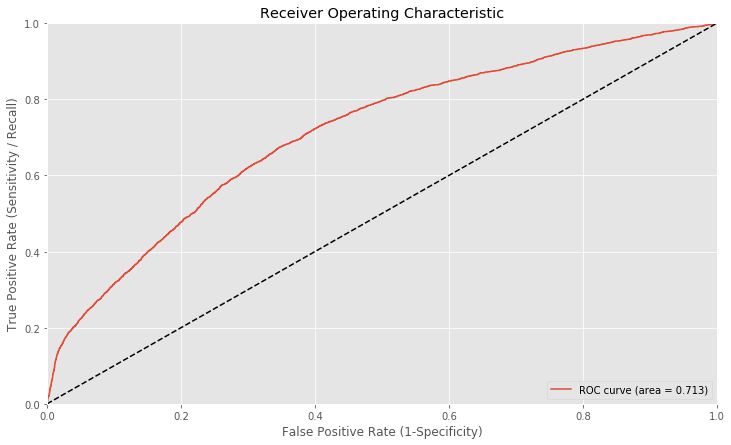

In [130]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % auc_score)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity / Recall)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()